In [66]:
# Random Forest :

#   collection of Decision Trees


# It uses Ensemble technique
# means there are multiple models which work together.

# sampling with replacement is called bootstrapping.
# means create multiple subsets of training data, subsets are created by random samples from training data with replacemnet

# each tree have voting right, if some models say this belongs to this category and some say that, majority wins

# parallel processing


In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [68]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [70]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [71]:
# perform na detection
# duplicates or not
# outliers or not
# correlation
# Scaling required or not
# Label encoding needed or not

In [72]:
# correlation using ANOVA
from scipy.stats import f_oneway

In [73]:
def checkAnova(categ_col, num_col, df):
  p = f_oneway(*df.groupby(categ_col)[num_col].apply(list))[1]

  if p>0.05 : print( "Accept H0, no relation")
  if p<0.05 : print("Failed to accept H0, there is relation")



In [74]:
checkAnova('species','petal_length', df)
checkAnova('species','petal_width',df)
checkAnova('species','sepal_length',df)
checkAnova('species','petal_width',df)

Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation


In [75]:
# OR in smart way
for i in df.columns:
  if df[i].dtype=='float64' or df[i].dtype=='int64':
    checkAnova('species',i, df)

Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation
Failed to accept H0, there is relation


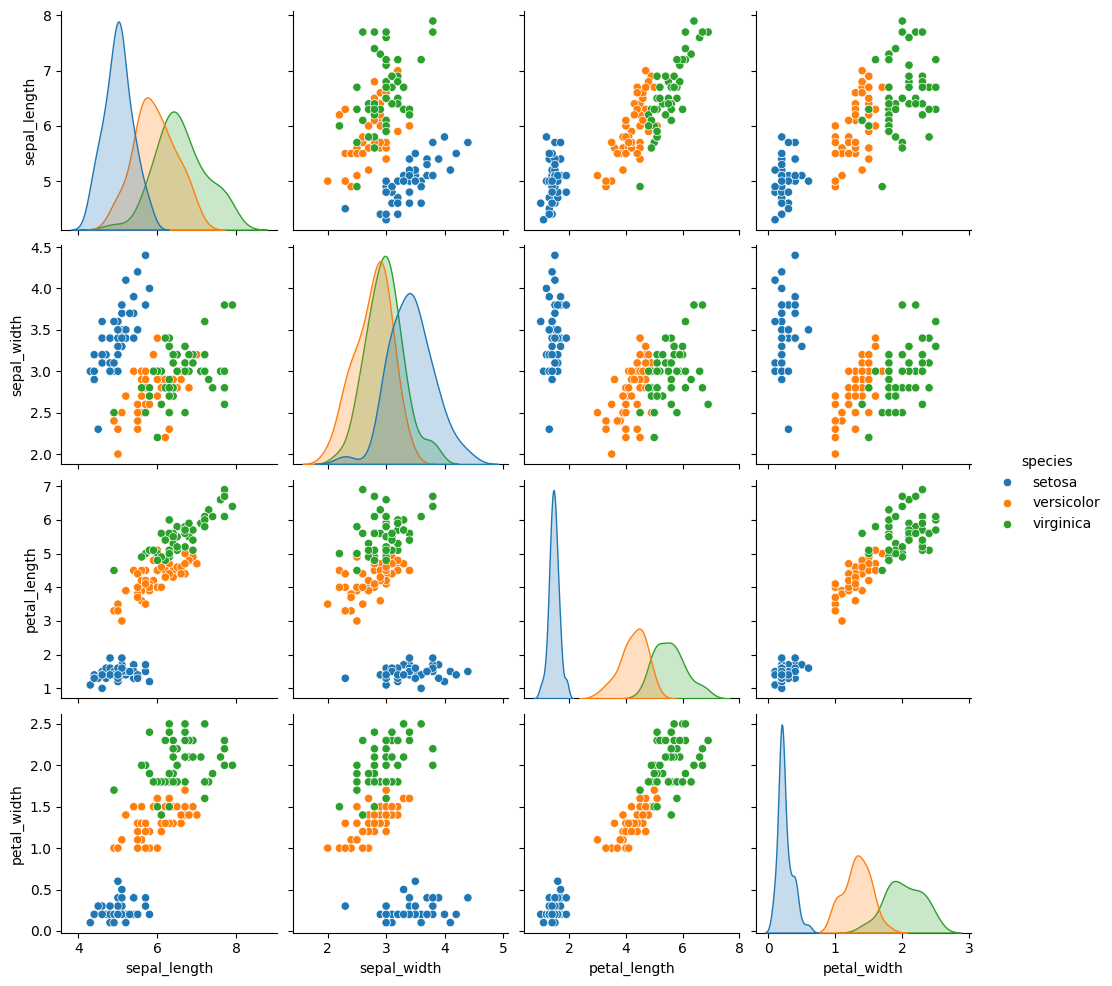

In [76]:
sns.pairplot(df, hue='species')

<Axes: xlabel='species', ylabel='petal_length'>

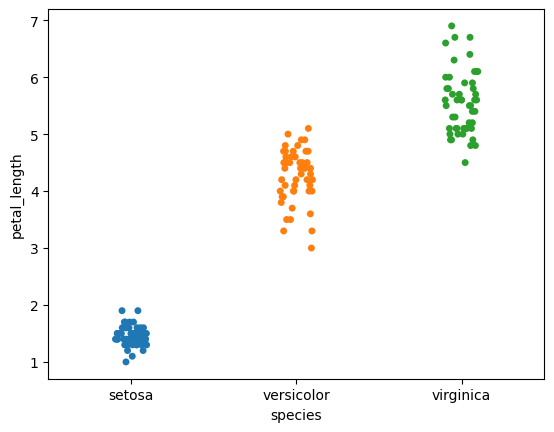

In [77]:
sns.stripplot(data=df,x='species',y='petal_length',hue='species',jitter=True)

In [78]:
# here petal length of versicolor and virginnica are overlapping,
# if we give only petal length to the model as a feature,
# it'll be confused in those 2 species
# so we have to take all features for training

In [79]:
x = df.iloc[:,:-1]
y = df.iloc[:,[-1]]


print(x.shape,y.shape, type(x), type(y))

(150, 4) (150, 1) <class 'pandas.core.frame.DataFrame'> <class 'pandas.core.frame.DataFrame'>


In [80]:
from sklearn.model_selection import train_test_split

In [81]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)


In [82]:
print(xtrain.shape,xtest.shape,ytrain.shape,ytest.shape)

(120, 4) (30, 4) (120, 1) (30, 1)


In [83]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, \
ConfusionMatrixDisplay, accuracy_score

In [84]:
model = DecisionTreeClassifier()
model.fit(xtrain,ytrain).score(xtest,ytest)

0.9666666666666667

In [85]:
yhat = model.predict(xtest)
accuracy_score(ytest,yhat)

0.9666666666666667

In [86]:
print(classification_report(ytest,yhat))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [87]:
cm = confusion_matrix(ytest,yhat)  ; cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

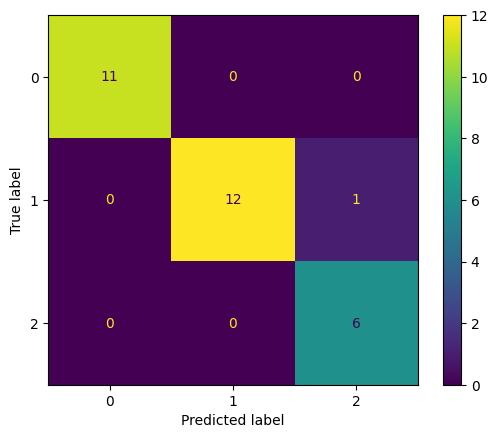

In [88]:
ConfusionMatrixDisplay(cm).plot()

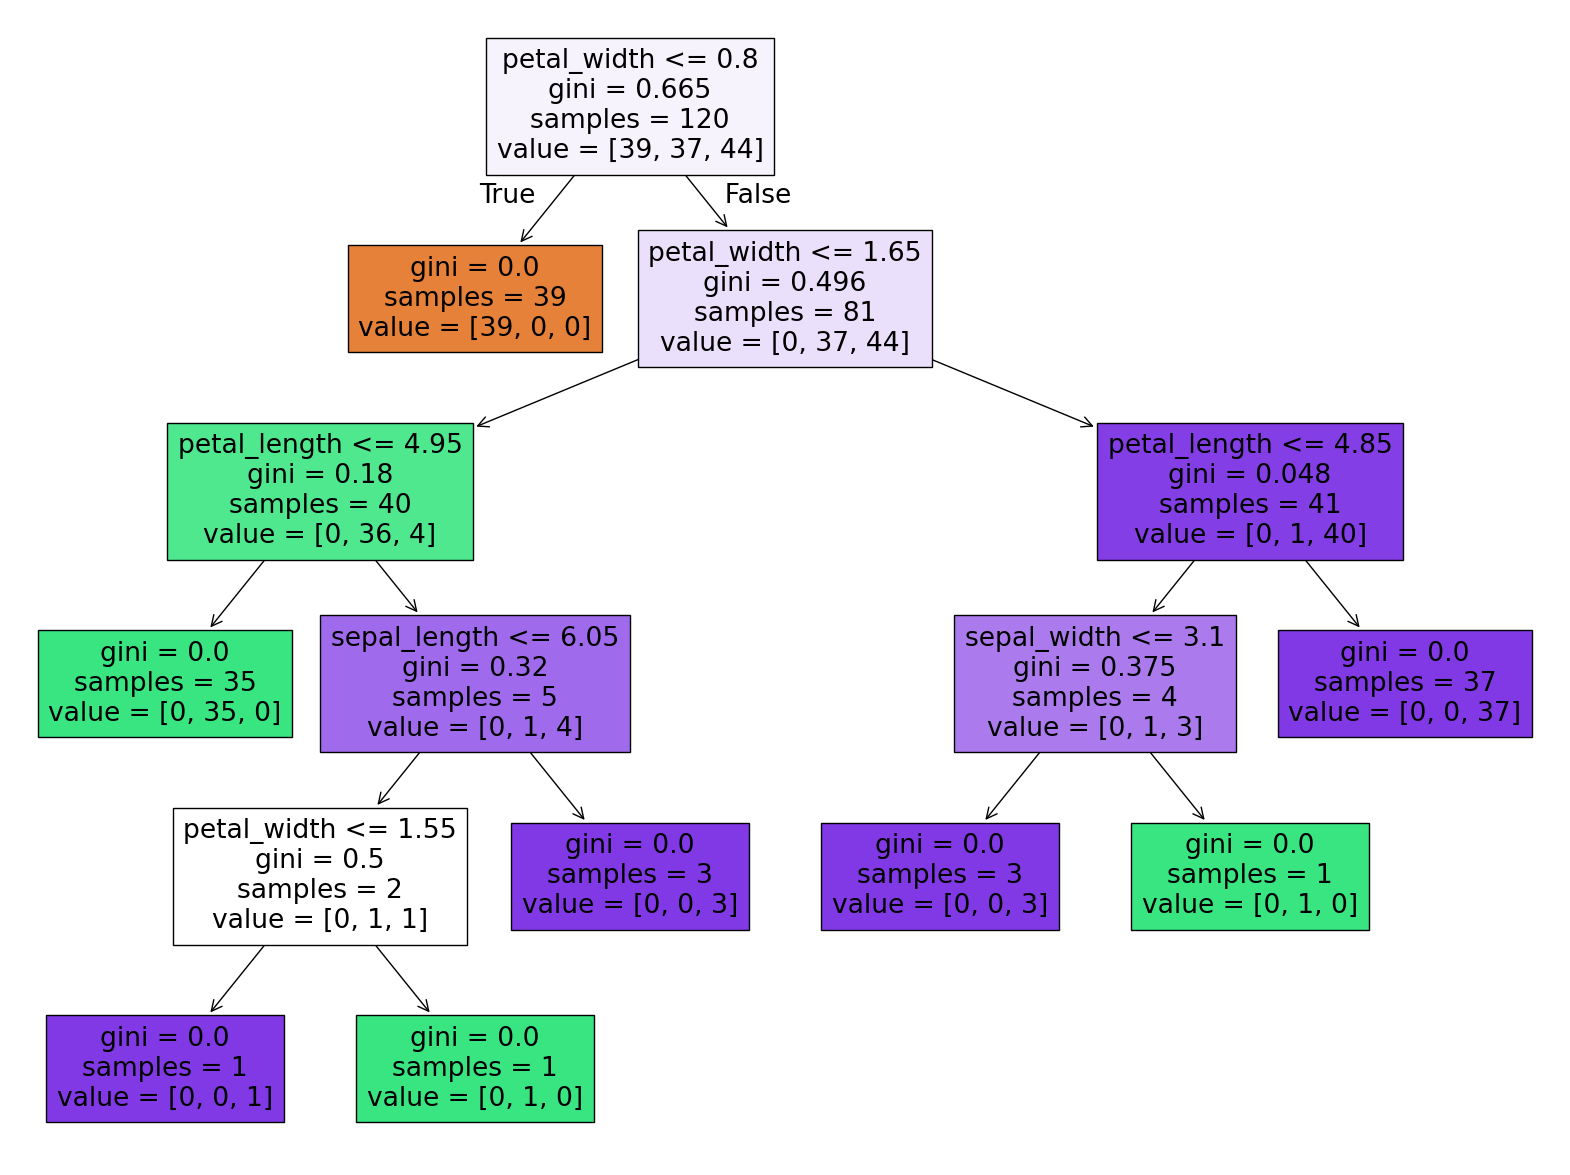

In [89]:
from sklearn import tree

features = df.columns[:-1]

plt.figure(figsize=(20,15))
tree.plot_tree(model, feature_names=features, filled=True);

In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfmodel = RandomForestClassifier(n_estimators=5, max_depth=3)
# default trees = 100 ; always take odd no. ; max_depth = 3 because bootstrap is 2
rfmodel.fit(xtrain,ytrain).score(xtest,ytest)


/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


0.9666666666666667

In [92]:
yhatrf = rfmodel.predict(xtest)
print(classification_report(ytest,yhatrf))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        11
  versicolor       1.00      0.92      0.96        13
   virginica       0.86      1.00      0.92         6

    accuracy                           0.97        30
   macro avg       0.95      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30



In [93]:
rfmodel.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1239428212),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=2100313024),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1775788136),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1764479197),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1357108757)]

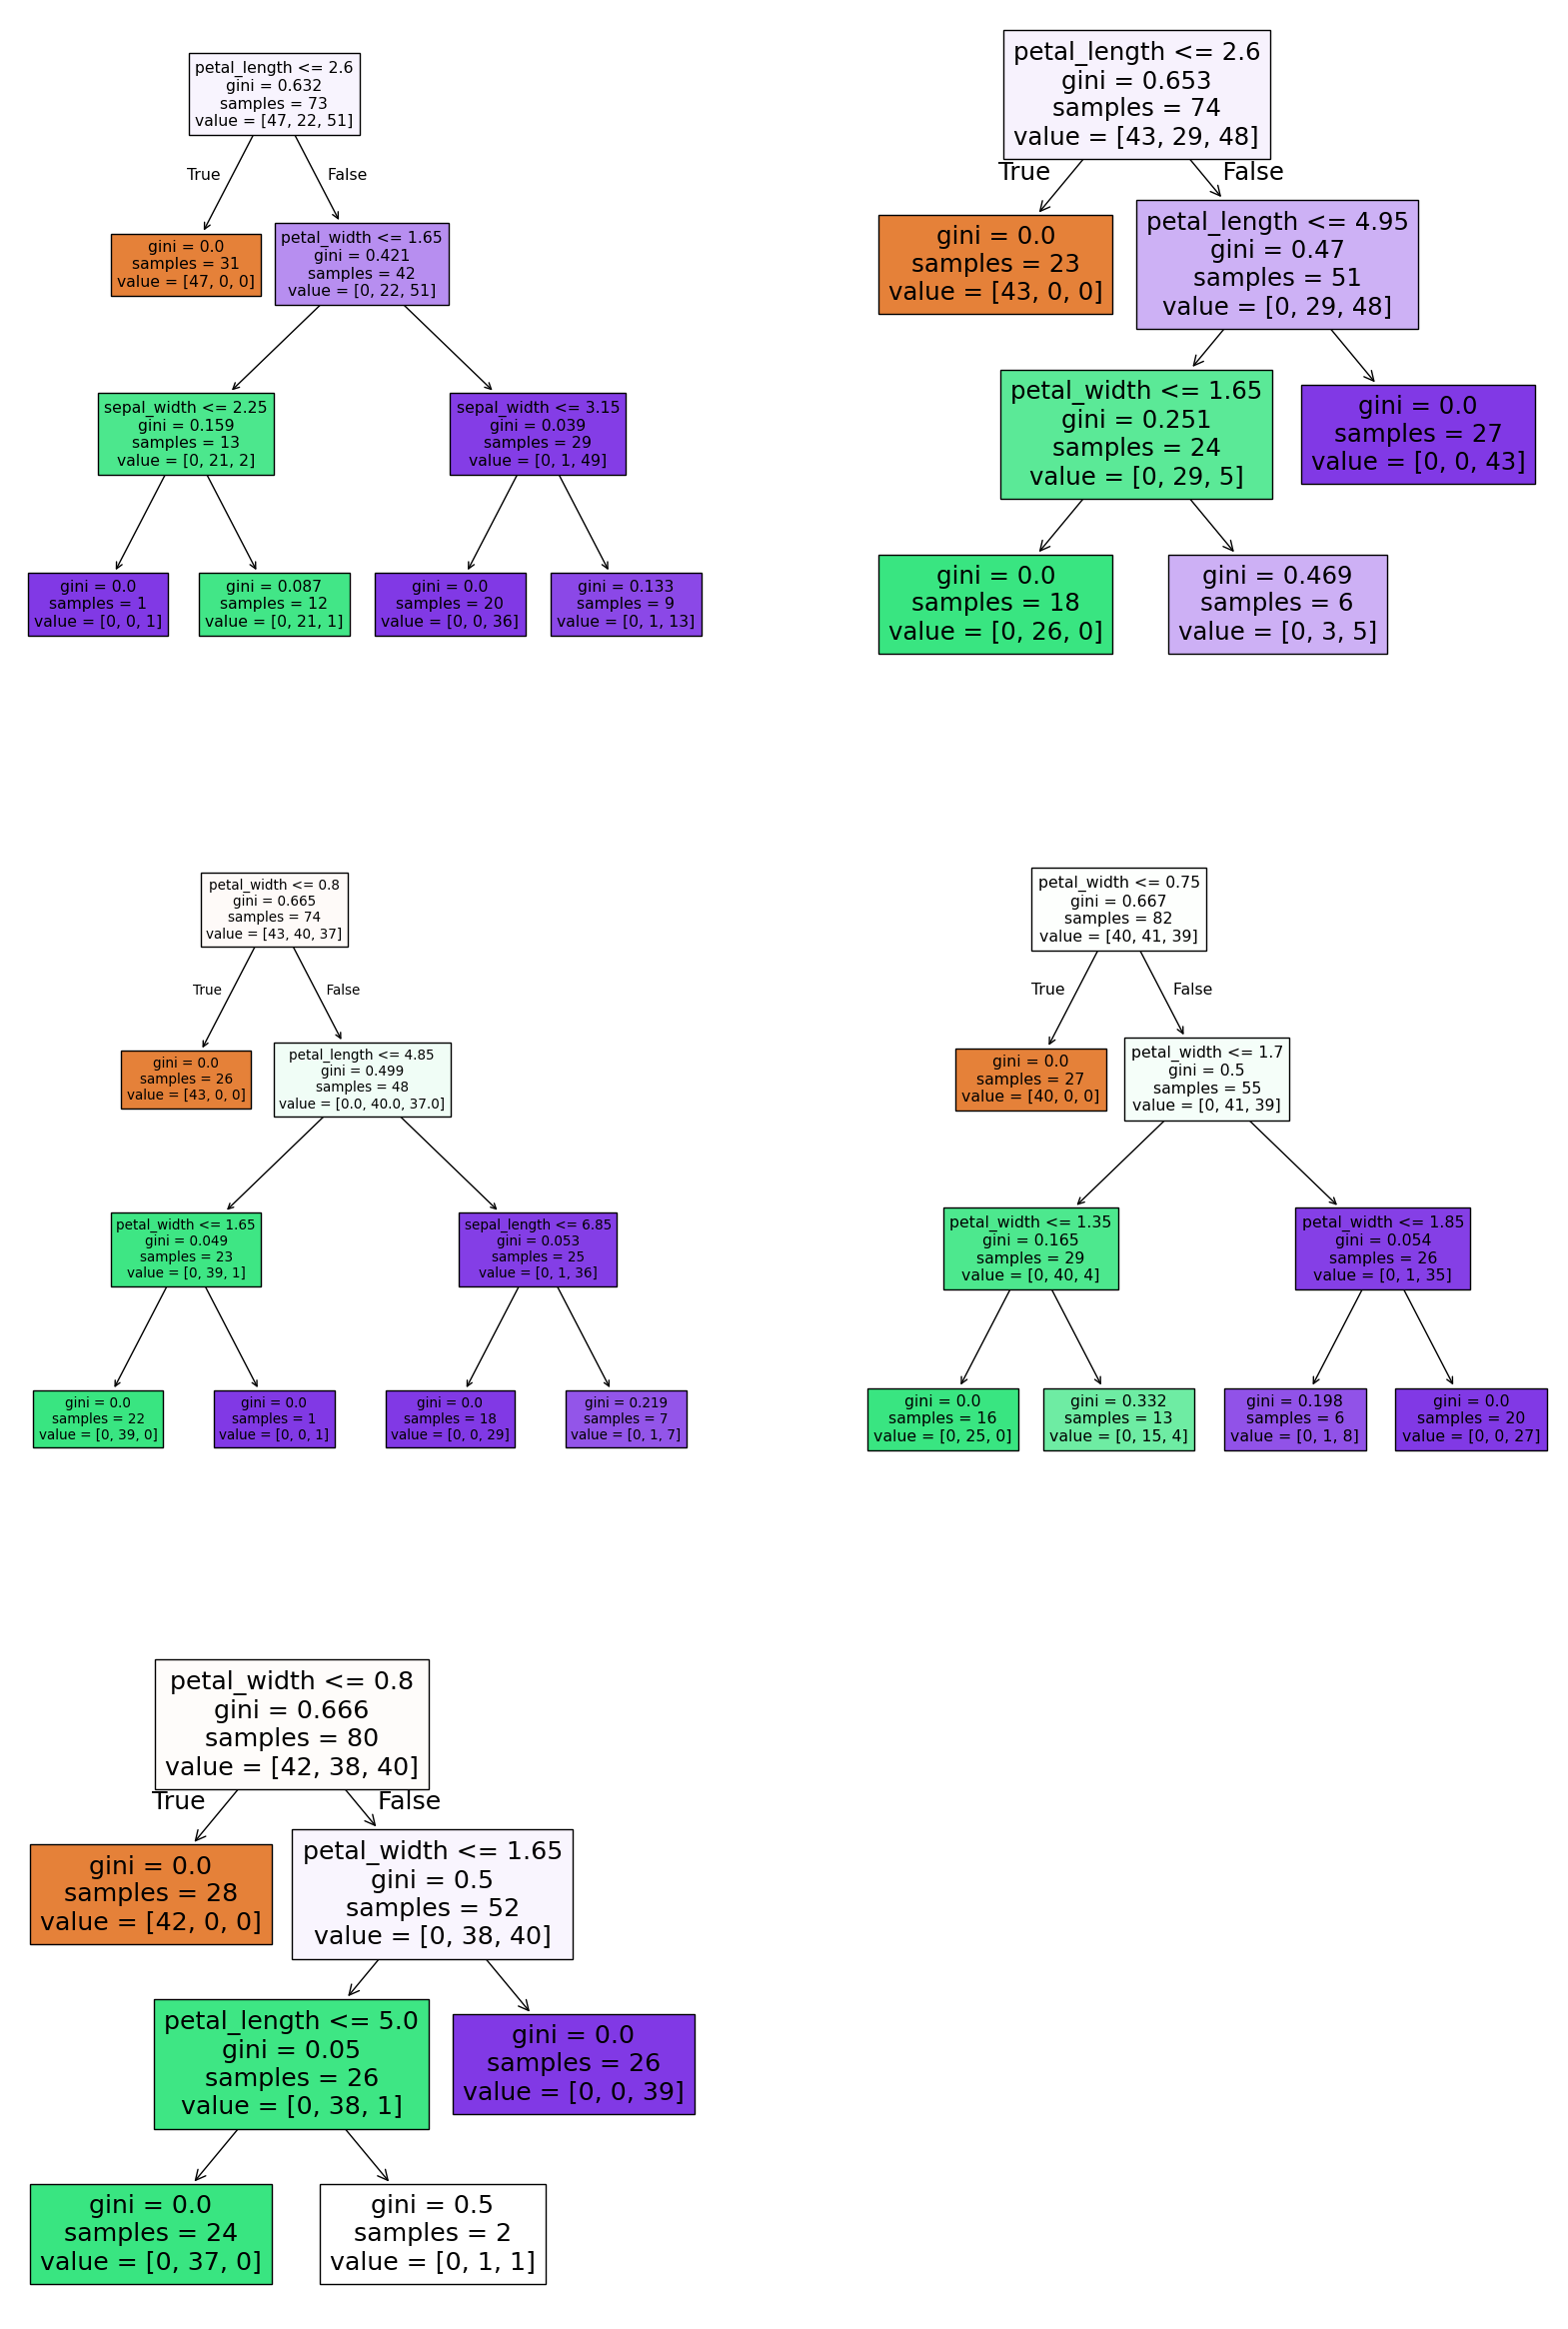

In [112]:
plt.figure(figsize=(20,30))

for i,j in enumerate(rfmodel.estimators_):
  plt.subplot(3,2,i+1)
  tree.plot_tree(j, feature_names=features, filled=True);

In [95]:
# hyperparamter Tuning

In [96]:
# grid search
from sklearn.model_selection import GridSearchCV

In [ ]:
params = {'n_estimators':[3,5,7,11],
          'max_depth':[2,3,4,5]}

gridmodel = RandomForestClassifier()

grid = GridSearchCV(gridmodel, params, cv=5)
grid.fit(xtrain,ytrain);



In [105]:
grid.best_params_

{'max_depth': 4, 'n_estimators': 7}

In [108]:
bestRFmodel = RandomForestClassifier(n_estimators=4, max_depth=7);
bestRFmodel.fit(xtrain,ytrain).score(xtest,ytest);
bestRFmodel.feature_importances_

/usr/local/lib/python3.12/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


array([0.0682227 , 0.01623097, 0.27682173, 0.6387246 ])

In [ ]:
# 1st and 2nd column are not that important, we can drop them

In [109]:
np.sum(bestRFmodel.feature_importances_)

np.float64(1.0)